In [9]:
import numpy as np
from pyairtable import Table,Api
import pandas as pd
from pprint import pprint
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import BERTSimilarity.BERTSimilarity as bertsimilarity

/Users/neralbcika/anaconda3/envs/stage-ai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
#BERT TASK
api = Api('patkECjZGaeJ3Rj2F.902a4dc39c614cbcba594a1d909db35a39dcd69f43d2bf692aaf32268c4d60d7')
tableMessages = api.table('appY85YsYveVhA1eC', 'Message Evaluations')
data=tableMessages.all()
fields = [record['fields'] for record in data] 
df=pd.DataFrame(fields)

In [16]:
#BERT TASK
gold_text = """" Sono Davide Morra co-founder di Volcanic Minds, una digital tech company che si occupa di soluzioni IT tailor-made (cloud, app, web, design). 
Le scrivo per entrare in contatto con XXX per future collaborazioni e perché trovo interessante il suo canale e i suoi contenuti."""
#bertsimilarity=bertsimilarity.BERTSimilarity()
# Iterate through rows and calculate normalized distance
#row = df.iloc[0]
# Print the result
#print(f"Normalized Distance for the row: {norm_dist}")
df['norm_distance'] = df.apply(lambda row: (bertsimilarity.calculate_distance(gold_text, row['Message']) * 2) + 1, axis=1)



    


In [20]:
api = Api('patdGU0Asa7Y2TB51.f30669d3c655fbb94884171b05b649b449df790e0cd82da7587b87c356be08fc')
tableMessages = api.table('appY85YsYveVhA1eC', 'New Message Evaluation')
for _, row in df.iterrows():
    record = row.to_dict()  # Convert row to Airtable format
    response = tableMessages.create(record)

In [ ]:
api = Api('patkECjZGaeJ3Rj2F.902a4dc39c614cbcba594a1d909db35a39dcd69f43d2bf692aaf32268c4d60d7')
tableMessages = api.table('appY85YsYveVhA1eC', 'Adv_prompt')
data=tableMessages.all()
fields = [record['fields'] for record in data]
df=pd.DataFrame(fields)

In [3]:
print(df.iloc[1])
type(df)

lead_data       619938ae59958d0001a77851 Nicolo Castellini 7 C...
company_type                                       non IT company
evaluation                                                    2.0
prompt          I'm doing some research for a project and I'm ...
company_data    INTESA SANPAOLO SPA Intesa sanpaolo  235 https...
lead                                            Nicolo Castellini
lead_title      Chief Data A.I. Innovation and Technology Offi...
company                                          Intesa sanpaolo 
model                                                gemma2-9b-it
message         I understand you're looking for information ab...
Name: 1, dtype: object


pandas.core.frame.DataFrame

In [ ]:
#metrics_columns = ['accuracy', 'hallucination', 'efficacy', 'fluency', 'coherence', 'transparency', 'safety', 'human_alignment']


In [50]:
#columns = ['model','accuracy','hallucination','efficacy','fluency','coherence','transparency','safety','human alignment']
#new_df= df[columns]
#grouped = new_df.groupby('model')
# Iterating through each group and printing its content

In [4]:
columns = ['prompt', 'model', 'evaluation']
new_df= df[columns]
grouped = new_df.groupby('model')
# Iterating through each group and printing its content

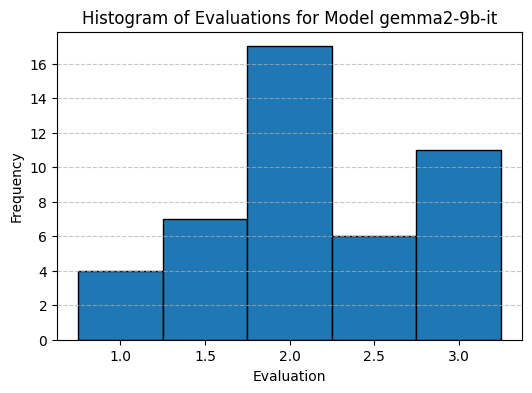

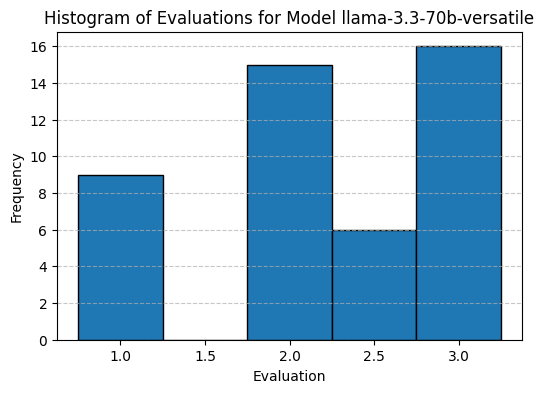

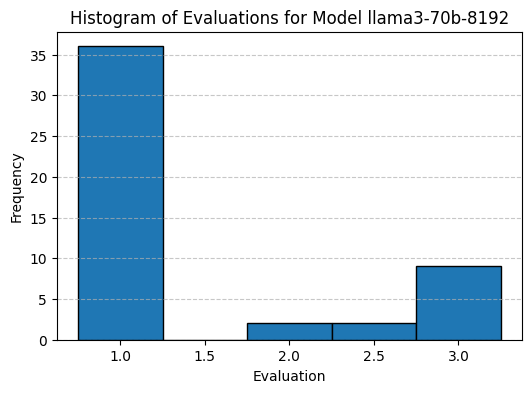

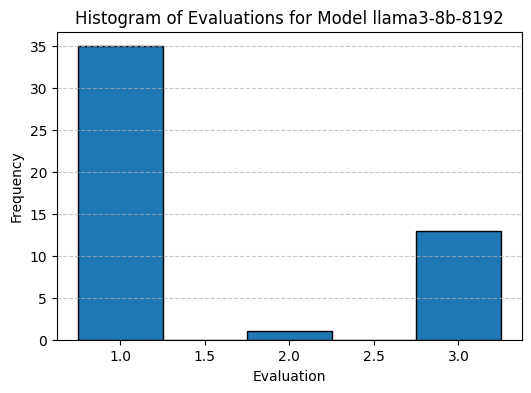

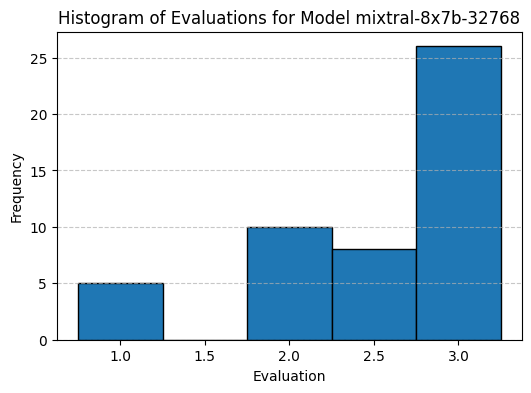

In [8]:
for model_name, group in grouped:
    plt.figure(figsize=(6, 4))
    plt.hist(group['evaluation'], bins=[1, 1.5, 2, 2.5, 3, 3.5], edgecolor='black', align='left')
    plt.title(f'Histogram of Evaluations for Model {model_name}')
    plt.xlabel('Evaluation')
    plt.ylabel('Frequency')
    plt.xticks([1, 1.5, 2, 2.5, 3])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

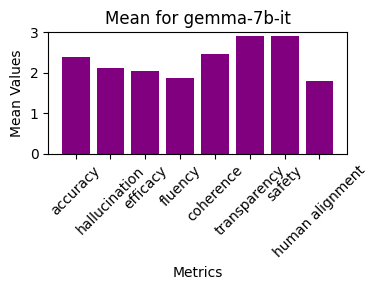

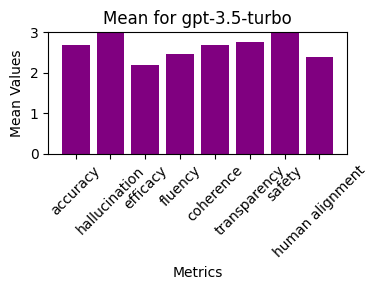

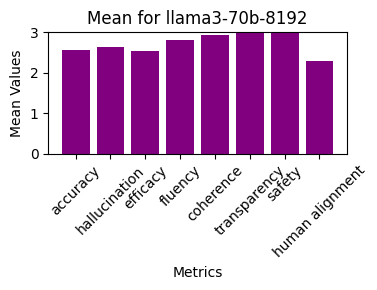

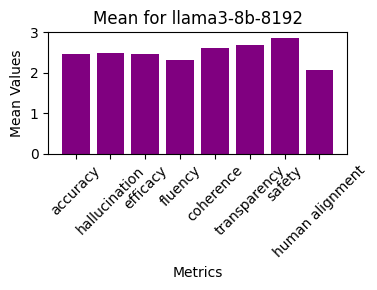

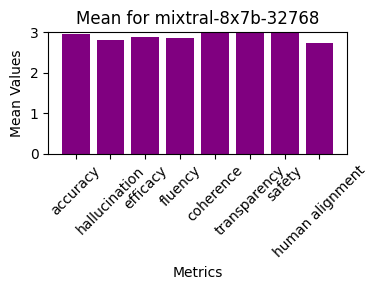

In [56]:
for model in grouped.index:  # grouped.index gives the unique group keys (model names)
    # Get the row data for the current model
    model_data = gr.loc[model]  # This gives a Series with the mean values for the current model

    # Plotting
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.bar(model_data.index, model_data.values, color = 'purple')  # Index is the metric names, values are the means

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Mean Values')
    ax.set_title(f'Mean for {model}')
    ax.set_ylim(0, 3)
    plt.xticks(rotation=45)  # Rotate metric labels for better visibility
    
    plt.tight_layout()
    plt.show()

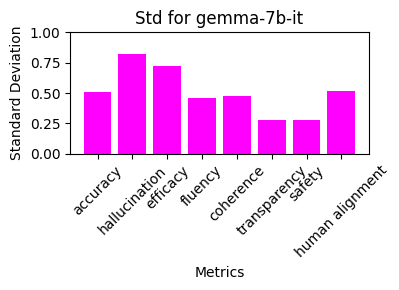

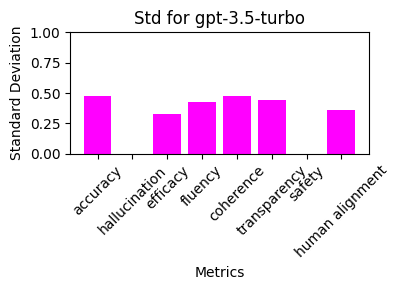

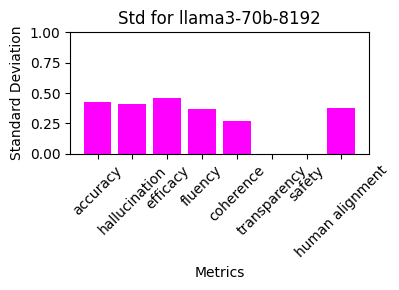

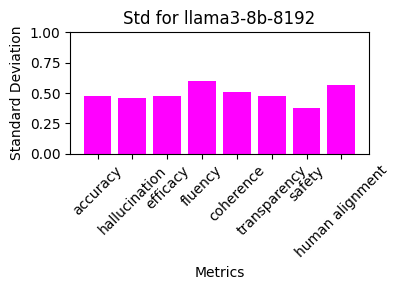

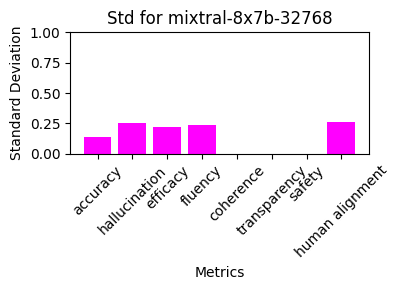

In [54]:
std_dff=grouped.std().round(2)
for model in std_dff.index:
    global_mean=0
    # Get std_dev values for the current model
    model_data = std_dff.loc[model]
    
    # Plotting
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.bar(model_data.index, model_data.values,color = 'magenta')
    
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Standard Deviation')
    ax.set_title(f'Std for {model}')
    ax.set_ylim(0, 1)  # Force y-axis scale to be 0–1
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

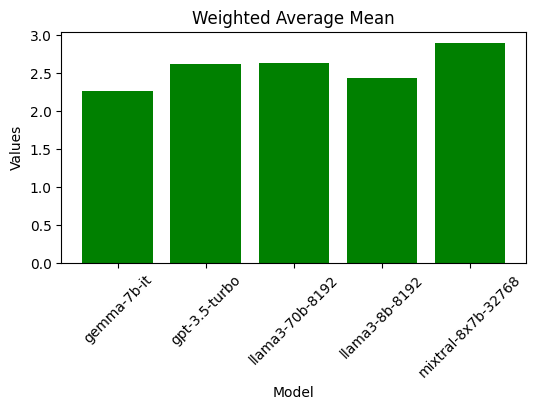

In [59]:
weights = {
    'accuracy': 0.3,
    'hallucination': 0.08,
    'efficacy': 0.08,
    'fluency': 0.1,
    'coherence': 0.08,
    'transparency': 0.08,
    'safety': 0.08,
    'human alignment': 0.2
}
weighted_sums = []
models = []
for model in gr.index:
    model_data = gr.loc[model]
    weighted_sum = 0
    for column, weight in weights.items():
        weighted_sum += model_data[column] * weight
    weighted_sums.append(weighted_sum)
    models.append(model)

plt.figure(figsize=(6, 3))
plt.bar(models, weighted_sums, color='green')
plt.xlabel('Model')
plt.ylabel('Values')
plt.title('Weighted Average Mean')
plt.xticks(rotation=45)
plt.show()



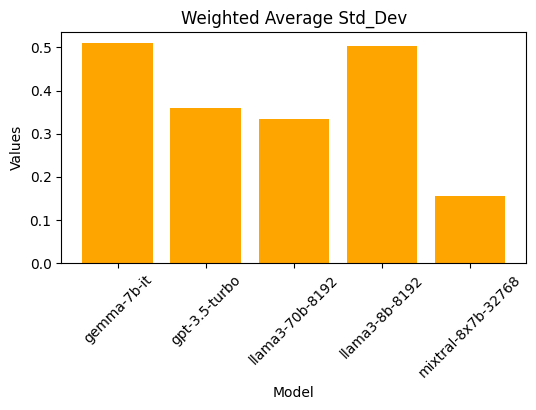

In [60]:
weights = {
    'accuracy': 0.3,
    'hallucination': 0.08,
    'efficacy': 0.08,
    'fluency': 0.1,
    'coherence': 0.08,
    'transparency': 0.08,
    'safety': 0.08,
    'human alignment': 0.2
}
weighted_sums = []
models = []
for m in std_dff.index:
    m_data = std_dff.loc[m]
    w_sum = 0
    for c, w in weights.items():
        w_sum += m_data[c] * w
    weighted_sums.append(w_sum)
    models.append(m)

plt.figure(figsize=(6, 3))
plt.bar(models, weighted_sums, color='orange')
plt.xlabel('Model')
plt.ylabel('Values')
plt.title('Weighted Average Std_Dev')
plt.xticks(rotation=45)
plt.show()
